In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#### Зчитуємо та перевіряємо дані


In [64]:
team = pd.read_csv('Euro_2012_stats_TEAM.csv')
team

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [57]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

#### 1.Поглянемо, які команди мали червоні картки 

In [65]:
red_cards = team[team['Red Cards'] > 0]['Team']
red_cards

6                  Greece
9                  Poland
11    Republic of Ireland
Name: Team, dtype: object

#### 2.Відсортуємо та поглянемо на топ 10 кoманд з найкращою точністю ударів

In [59]:
sorted_data = team.sort_values(by='Shooting Accuracy', ascending=False)

top_10_teams = sorted_data.head(10)
print("Топ 10 команд з найкращою точністю ударів:")
for team in top_10_teams['Team']:
    print(team)

Топ 10 команд з найкращою точністю ударів:
Spain
Croatia
Denmark
England
Germany
Sweden
Italy
Czech Republic
Poland
France


#### 3.Погрупуємо данні за результативністю команд

In [66]:
def classify_goals(goals):
    if goals >= 9:
        return "Висока результативність"
    elif goals >= 4:
        return "Середня результативність"
    else:
        return "Низька результативність"

team['Група результативності'] = team['Goals'].apply(classify_goals)

grouped = team.groupby('Група результативності')['Team'].apply(list).reset_index()

for index, row in grouped.iterrows():
    group = row['Група результативності']
    teams = ", ".join(row['Team'])
    print(f'Група: {group}')
    print(f'Команди: {teams}')
    print()

Група: Висока результативність
Команди: Germany, Spain

Група: Низька результативність
Команди: France, Netherlands, Poland, Republic of Ireland, Ukraine

Група: Середня результативність
Команди: Croatia, Czech Republic, Denmark, England, Greece, Italy, Portugal, Russia, Sweden



#### 4.Знайдемо інформацію про команди, в яких грало більше 17 гравців

In [67]:
d = team.set_index('Team')
d[d['Players Used'] > 17]

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,Група результативності
Team,,,,,,,,,,,,,,,,,,,,,
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,60.1%,53,73,8,7,0,11,11,19,Середня результативність
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,54.6%,36,51,5,6,0,11,11,19,Низька результативність
Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,...,65.1%,67,48,12,9,1,12,12,20,Середня результативність
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,...,74.1%,101,89,16,16,0,18,18,19,Середня результативність
Spain,12,42,33,55.9%,16.0%,100,0,1,0,2,...,93.8%,102,83,19,11,0,17,17,18,Висока результативність
Sweden,5,17,19,47.2%,13.8%,39,3,0,0,1,...,61.6%,35,51,7,7,0,9,9,18,Середня результативність
Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,2,...,76.5%,48,31,4,5,0,9,9,18,Низька результативність


#### 5.Які країни забили голи у пенальті?

In [62]:
d[d['Penalty goals'] > 0].index

Index(['Germany', 'Greece', 'Spain'], dtype='object', name='Team')

#### 6.Який відсоток ударів по воротах був відбитий воротарем? 

In [68]:
team['Saves-to-shots ratio'] = round((team['Shots on target'] / (team['Shots on target'] + team['Shots off target']))*100,2)
shots_data = team.groupby('Team')['Saves-to-shots ratio'].mean()
shots_data

Team
Croatia                52.00
Czech Republic         41.94
Denmark                50.00
England                37.93
France                 47.83
Germany                50.00
Greece                 30.77
Italy                  43.04
Netherlands            25.00
Poland                 39.47
Portugal               34.38
Republic of Ireland    36.84
Russia                 22.50
Spain                  56.00
Sweden                 47.22
Ukraine                21.21
Name: Saves-to-shots ratio, dtype: float64

#### 7.Візуалізуємо співвідношення жовтих карток до команд

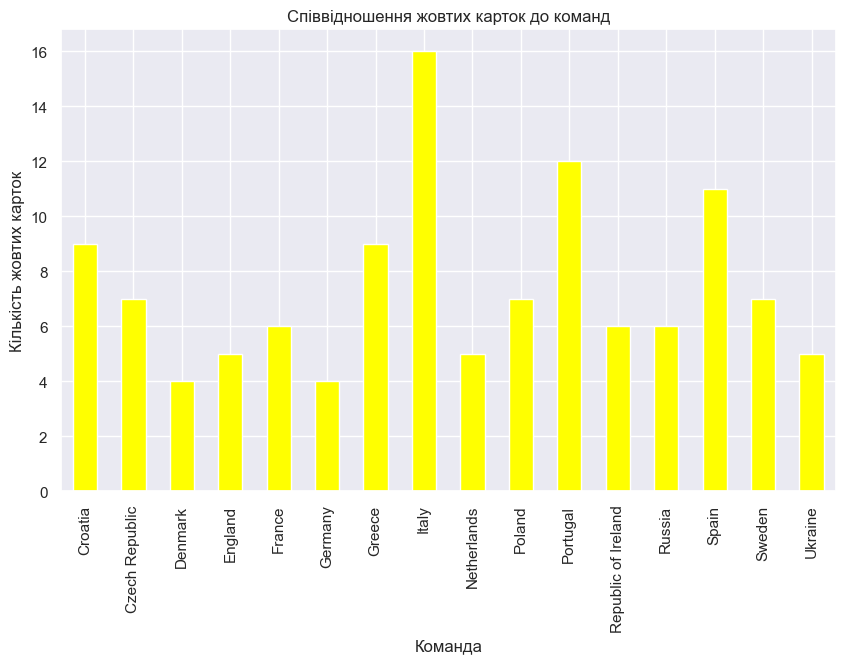

In [69]:
country_yellow_cards = team.groupby('Team')['Yellow Cards'].sum()

plt.figure(figsize=(10, 6))
country_yellow_cards.plot(kind='bar', color='yellow')
plt.title('Співвідношення жовтих карток до команд')
plt.xlabel('Команда')
plt.ylabel('Кількість жовтих карток')
plt.xticks(rotation=90)
plt.show()

#### 8.Топ-5 команд за попаданню по цілі

In [70]:
data = team.sort_values("Shots on target", ascending=False)
top_5 = data.head(5)

top_5[["Team", "Shots on target"]]

,Team,Shots on target
13,Spain,42
7,Italy,34
5,Germany,32
4,France,22
10,Portugal,22


#### 9.Які голи команди забивали частіше?

In [71]:
team["Pen or Head"] = team.apply(lambda row: "Pen" if row["Penalty goals"] > row["Headed goals"] else "Head", axis="columns")
team.groupby('Pen or Head')['Team'].count().index[0]

'Head'

#### 10.Дослідимо кореляції і візуалізуємо їх

Для цього оберемо тільки числові дані

In [72]:
numerics = ['int64']
num_data = team.select_dtypes(include=numerics)

<Axes: >

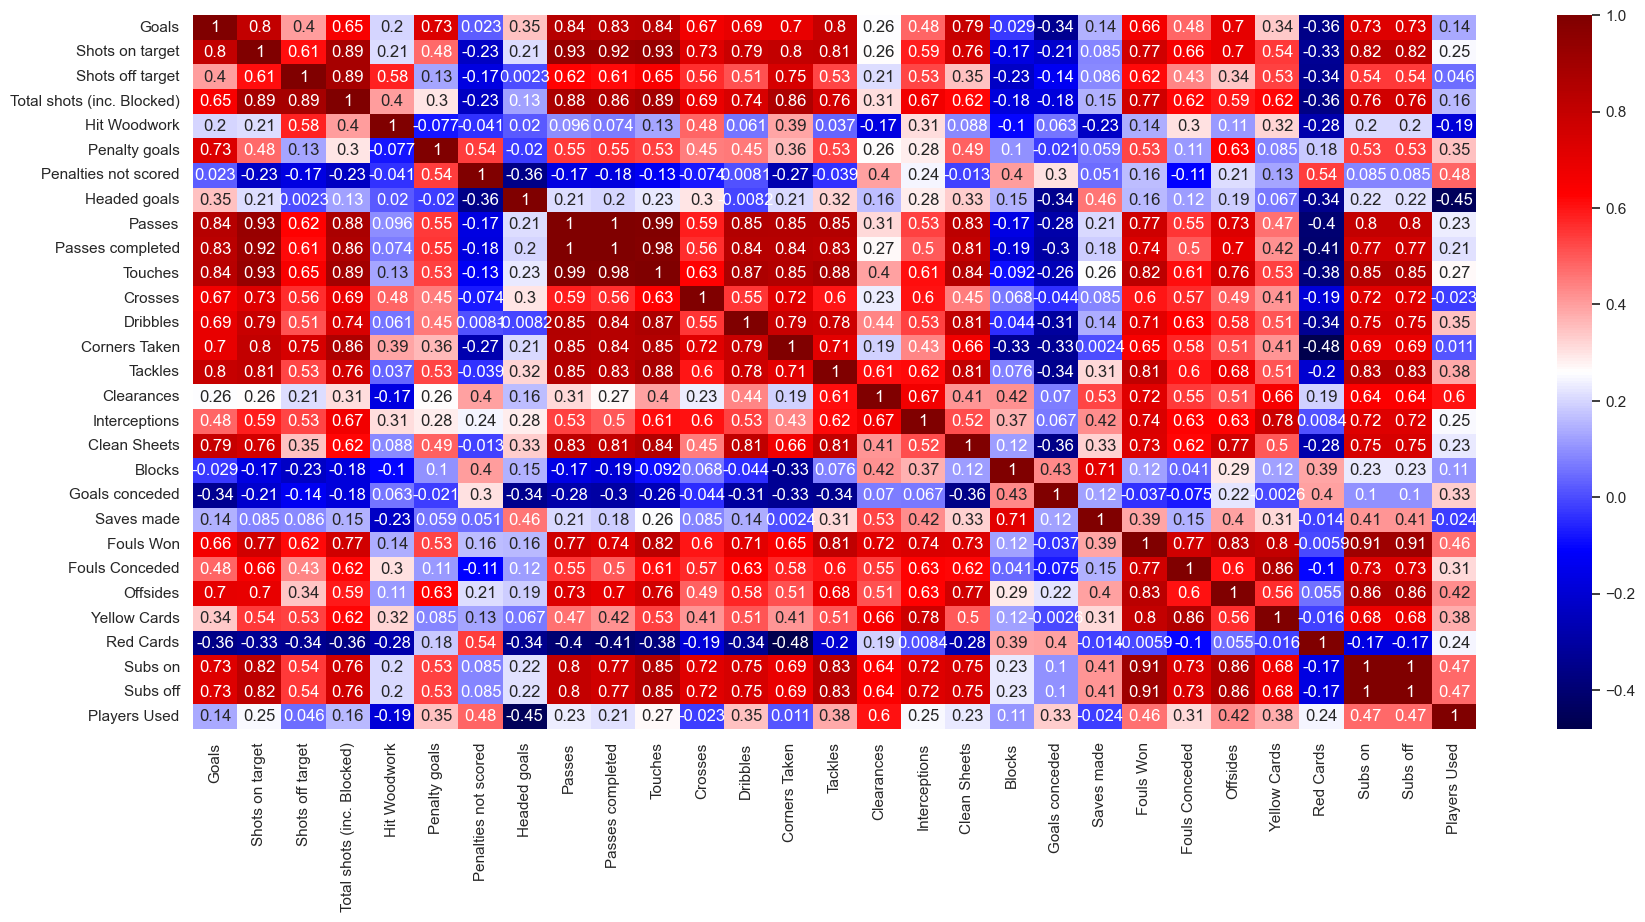

In [73]:
sns.set(rc={'figure.figsize':(20.7,9.27)})
sns.heatmap(num_data.corr(), annot=True, cmap='seismic')